# Common types of cross-validation
> Modified from: https://scikit-learn.org/stable/modules/cross_validation.html

- Exhaustive cross-validation

  Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
  
  - Leave One Out (LOO)
  - Leave P Out (LPO)
  - Leave One Group Out
  - Leave P Groups Out


- Non-exhaustive cross-validation

  Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.
  
  - K-fold
  - Shuffle Split
  - Stratified Versions (Stratified K-fold & Shuffle Split)
  - Grouped Versions (Group K-fold & Shuffle Split)


## Exhaustive cross-validation

- Leave One Out (LOO)
- Leave P Out (LPO)
- Leave One Group Out
- Leave P Groups Out

### Leave One Out (LOO)

A simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for $n$ samples, we have $n$ different training sets and $n$ different test set.

In [1]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


### Leave P Out (LPO)

is very similar to LeaveOneOut as it creates all the possible training/test sets by removing $p$ samples from the complete set. For $n$ samples, this produces ${n \choose p}$ train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for $p > 1$.

Example of Leave-2-Out on a dataset with 4 samples:

In [2]:
import numpy as np
from sklearn.model_selection import LeavePOut

X = np.ones(5)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

[2 3 4] [0 1]
[1 3 4] [0 2]
[1 2 4] [0 3]
[1 2 3] [0 4]
[0 3 4] [1 2]
[0 2 4] [1 3]
[0 2 3] [1 4]
[0 1 4] [2 3]
[0 1 3] [2 4]
[0 1 2] [3 4]


### Leave One Group Out

A cross-validation scheme which holds out the samples according to a third-party provided array of integer groups. This group information can be used to encode arbitrary domain specific pre-defined cross-validation folds.

Each training set is thus constituted by all the samples except the ones related to a specific group.

In [3]:
from sklearn.model_selection import LeaveOneGroupOut

X = [1, 5, 10, 50, 60, 70, 80]
y = [0, 1, 1, 2, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3, 3]
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


### Leave P Groups Out

LeavePGroupsOut is similar as LeaveOneGroupOut, but removes samples related to $P$ groups for each training/test set.

Example of Leave-2-Group Out:

In [4]:
from sklearn.model_selection import LeavePGroupsOut

X = np.arange(6)
y = [1, 1, 1, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3]
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[4 5] [0 1 2 3]
[2 3] [0 1 4 5]
[0 1] [2 3 4 5]


## Non-exhaustive cross-validation

- K-fold
- Shuffle Split
- Stratified Versions (Stratified K-fold & Shuffle Split)
- Grouped Versions (Group K-fold & Shuffle Split)

### K-fold

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.

In [5]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d", "f", "g"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[3 4 5] [0 1 2]
[0 1 2] [3 4 5]


# Examples of Different Kinds of Cross Validation
Learning Objectives here:
* Identify how each type of Cross Validation partitions data
* Analyze when using the wrong type of cross-validation would produce a bias out of sample error.

In [13]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

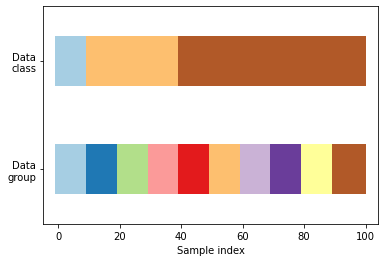

In [14]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

In [15]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

<AxesSubplot:title={'center':'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

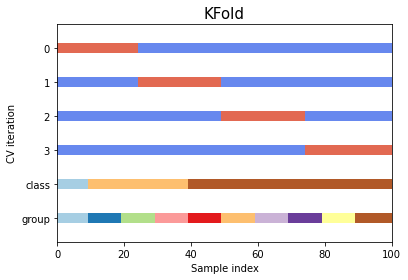

In [16]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

### Shuffle Split (Repeated random sub-sampling validation)

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.
The advantage of this method (over k-fold cross validation) is that the proportion of the training/validation split is not dependent on the number of iterations (folds). The disadvantage of this method is that some observations may never be selected in the validation subsample, whereas others may be selected more than once. In other words, validation subsets may overlap.

In [17]:
from sklearn.model_selection import ShuffleSplit
#X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[43 62  3 71 45 48  6 99 82 76 60 80 90 68 51 27 18 56 63 74  1 61 42 41
  4 15 17 40 38  5 91 59  0 34 28 50 11 35 23 52 10 31 66 57 79 85 32 84
 14 89 19 29 49 97 98 69 20 94 72 77 25 37 81 46 39 65 58 12 88 70 87 36
 21 83  9 96 67 64 47 44] [26 86  2 55 75 93 16 73 54 95 53 92 78 13  7 30 22 24 33  8]
[79  1 45 28 60 52 25 39 97 44 16 55 83 49 22 70 47  4 82 94 53 66 26 84
 31 63  8 75 98 57 71 99 86 96 69 24 30 13 40 56 68 95 81 19 38 91 54 32
 51 85 11 89 90 36 65 88 41 14 27 50 20 46 67 35 62  2 59 23 58 43 10  0
 73 21 77 42  3 93 48 34] [18 29 64 92 72 87  5 15 12 17 61 76  9 78 80  7 33  6 37 74]
[52 73 80 74 62 30 99 70 18 89 81 83 60 25 56 17  1  8 16 55 48 92  0 36
 40  5 94 98 49 34 91 33 21 90  7 45 79 85 68 31 65 44 50 26 75 95 78 41
  9 39 93 97 29 77 20 46 51 53 23 27  2 28 37 54 10 84 11 32 43 87 69 61
 86 35 76  3 82 67 24 88] [42 96 58 14 72  4 47 64 57 63  6 38 13 59 66 71 15 22 19 12]
[57 61 47 76 12  9 43 17 31  3 98 44 88 38  6  1 23 40 30 34 83 60 27 10
 26 45

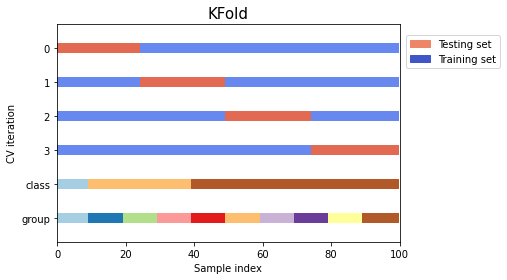

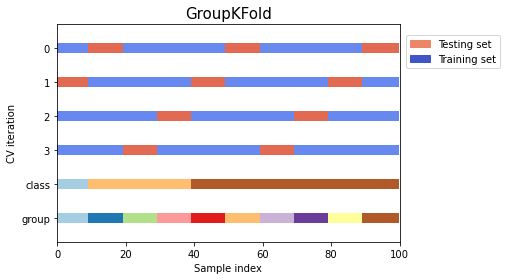

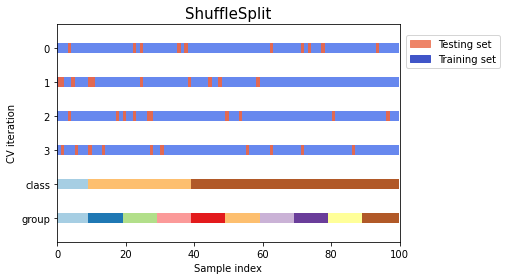

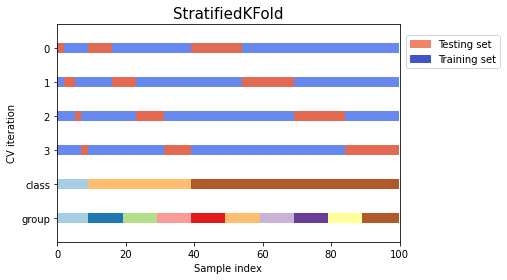

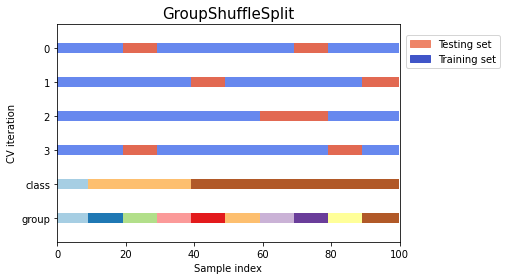

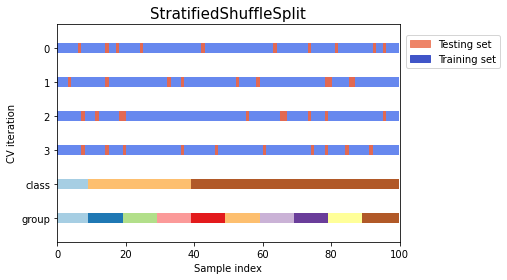

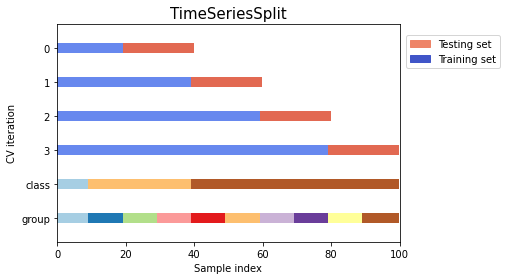

In [18]:
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold, GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]
#cvs = [ShuffleSplit]

for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()